Here we manually set the BR(a->bb) threshold to be `2*MBP` (MBP = b pole mass) instead of the 10.6 (meson mass) in hdecay.f (circa line 1440)

In [11]:
from copy import deepcopy
from contextlib import contextmanager

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import LogNorm, Normalize
import matplotlib.gridspec as gridspec
from itertools import izip
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, MultipleLocator
from collections import namedtuple
from IPython.display import IFrame
import functools

%matplotlib inline

get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')


mpl.rcParams['font.size'] = 26
mpl.rcParams['figure.figsize'] = (9.0, 6.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 26
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['xtick.major.size'] = 12
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 12
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 6
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.minor.size'] = 6
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['legend.framealpha'] = 0.9
mpl.rcParams['legend.scatterpoints'] = 1
mpl.rcParams['legend.numpoints'] = 1
# mpl.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
mpl.rcParams.update({'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
pd.set_option('display.max_colwidth', 120)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['ytick.major.pad'] = 8

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
df = pd.read_csv("masses_br.dat", delim_whitespace=True)

In [24]:
df.head()

,ma1,BR(gg),BR(cc),BR(ss),BR(bb),BR(tautau)
0,6.456956,0.043757,0.004143,0.017196,0.0,0.930950
1,6.506956,0.044377,0.004225,0.017071,0.0,0.930387
2,6.556956,0.045015,0.004309,0.016949,0.0,0.929802
3,6.606956,0.045671,0.004395,0.016829,0.0,0.929195
4,6.656956,0.046345,0.004484,0.016712,0.0,0.928564


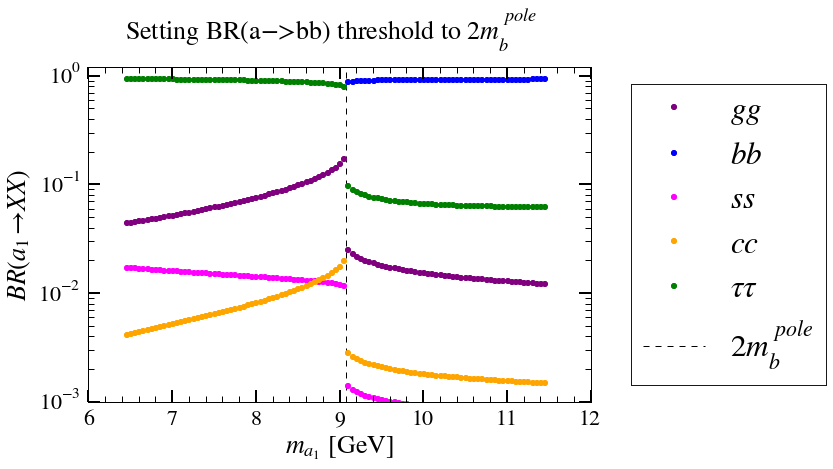

In [36]:
plt.plot(df.ma1.values, df['BR(gg)'].values, 'o', color='purple', label=r'$gg$', mew=0)
plt.plot(df.ma1.values, df['BR(bb)'].values, 'o', color='blue', label=r'$bb$', mew=0)
plt.plot(df.ma1.values, df['BR(ss)'].values, 'o', color='fuchsia', label=r'$ss$', mew=0)
plt.plot(df.ma1.values, df['BR(cc)'].values, 'o', color='orange', label=r'$cc$', mew=0)
plt.plot(df.ma1.values, df['BR(tautau)'].values, 'o', color='green', label=r'$\tau\tau$', mew=0)
plt.xlabel(r'$m_{a_1}\ [\mathrm{GeV}]$')
plt.ylabel(r'$BR(a_1 \to XX)$')
plt.ylim(1E-3, 1.2)
plt.yscale('log')
plt.vlines(2*4.54, *plt.ylim(), label=r'$2m_{b}^{pole}$', linestyle='dashed')
lgd = plt.legend(loc='center right', bbox_to_anchor=(1.5,0.5))
plt.minorticks_on()
tit = plt.suptitle('Setting BR(a->bb) threshold to '+r'$2m_{b}^{pole}$', y=1.04)
# plt.tight_layout()
plt.gcf().set_size_inches(9, 6)
plt.savefig('modified_abb_threshold.pdf', bbox_extra_artists=(lgd,tit), bbox_inches='tight')